In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time as t

from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap
from scipy.integrate import solve_ivp

plt.rcParams.update({'font.size': 12})

------------
## Vodikov bromid
------------

### Eksaktna rešitev

In [63]:
# Sistem od diferential equations

def f(time, vec, p, q, r, s, t):
    u, v, x, y, z = vec

    # Compute the derivatives
    dudt = s*x*y - r*u*z
    dvdt = q*z**2 - p*v - t*v*y
    dxdt = r*z*u - s*x*y + t*y*v
    dydt = r*z*u - s*x*y - t*y*v
    dzdt = 2*p*v - 2*q*z**2 - r*u*z + s*x*y + t*y*v

    return [dudt, dvdt, dxdt, dydt, dzdt]

# Parameters
p = 1.
q = 1.
r = 1.
s = 2.
t = 5.

# Initial values and desired time span
xs = np.array([100., 1., 0.01])

initial_vs = 1/(xs+1)
initial_us = xs/(xs+1)
y01 = [initial_us[0], initial_vs[0], 0., 0., 0.]
y02 = [initial_us[1], initial_vs[1], 0., 0., 0.]
y03 = [initial_us[2], initial_vs[2], 0., 0., 0.]

t_initial = 0.
t_final = 50.
num_points = 5000
ts = np.linspace(t_initial, t_final, num_points)
t_span = (t_initial, t_final)

# Solve the diferenial equations
solution1 = solve_ivp(f, t_span, y01, t_eval=ts, method='DOP853', args=(p,q,r,s,t))
solution2 = solve_ivp(f, t_span, y02, t_eval=ts, method='DOP853', args=(p,q,r,s,t))
solution3 = solve_ivp(f, t_span, y03, t_eval=ts, method='DOP853', args=(p,q,r,s,t))

# The solution in in solution.y
u_solution1, v_solution1, x_solution1, y_solution1, z_solution1 = solution1.y
u_solution2, v_solution2, x_solution2, y_solution2, z_solution2 = solution2.y
u_solution3, v_solution3, x_solution3, y_solution3, z_solution3 = solution3.y

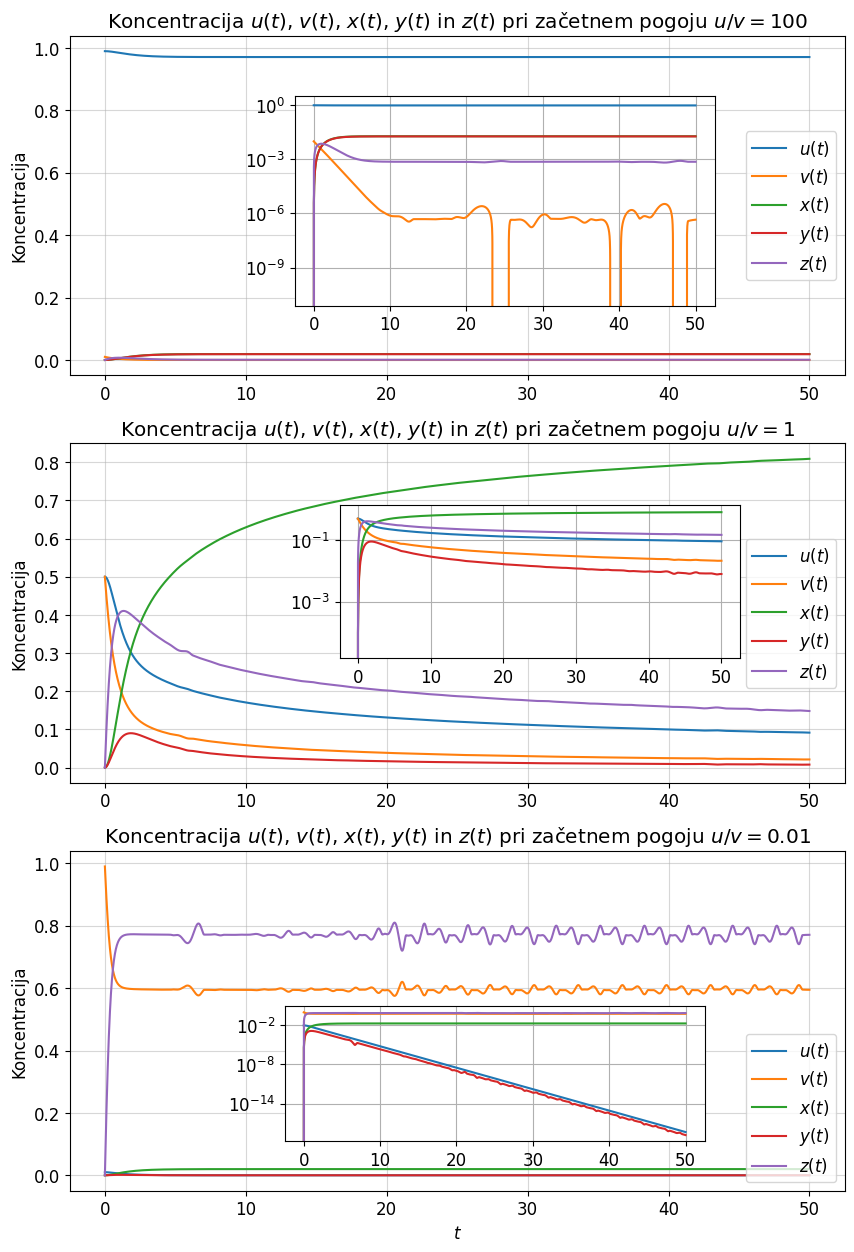

In [64]:
# Plot the solutions
fig = plt.figure(figsize=(10,15))

ax1 = fig.add_subplot(3,1,1)
ax1.grid(alpha=0.5)
ax1.set_title(r'Koncentracija $u(t)$, $v(t)$, $x(t)$, $y(t)$ in $z(t)$ pri začetnem pogoju $u/v=100$')
ax1.set_ylabel('Koncentracija')
ax1.plot(ts, u_solution1, label=r'$u(t)$')
ax1.plot(ts, v_solution1, label=r'$v(t)$')
ax1.plot(ts, x_solution1, label=r'$x(t)$')
ax1.plot(ts, y_solution1, label=r'$y(t)$')
ax1.plot(ts, z_solution1, label=r'$z(t)$')
ax1.legend()

ax1_inset = fig.add_axes([0.35, 0.70, 0.42, 0.14])  # Adjust the values as needed
ax1_inset.grid()
ax1_inset.set_yscale('log')
ax1_inset.plot(ts, u_solution1, label=r'$u(t)$')
ax1_inset.plot(ts, v_solution1, label=r'$v(t)$')
ax1_inset.plot(ts, x_solution1, label=r'$x(t)$')
ax1_inset.plot(ts, y_solution1, label=r'$y(t)$')
ax1_inset.plot(ts, z_solution1, label=r'$z(t)$')


ax2 = fig.add_subplot(3,1,2)
ax2.grid(alpha=0.5)
ax2.set_title(r'Koncentracija $u(t)$, $v(t)$, $x(t)$, $y(t)$ in $z(t)$ pri začetnem pogoju $u/v=1$')
ax2.set_ylabel('Koncentracija')
ax2.plot(ts, u_solution2, label=r'$u(t)$')
ax2.plot(ts, v_solution2, label=r'$v(t)$')
ax2.plot(ts, x_solution2, label=r'$x(t)$')
ax2.plot(ts, y_solution2, label=r'$y(t)$')
ax2.plot(ts, z_solution2, label=r'$z(t)$')
ax2.legend()

ax2_inset = fig.add_axes([0.395, 0.465, 0.40, 0.102])  # Adjust the values as needed
ax2_inset.grid()
ax2_inset.set_yscale('log')
ax2_inset.plot(ts, u_solution2, label=r'$u(t)$')
ax2_inset.plot(ts, v_solution2, label=r'$v(t)$')
ax2_inset.plot(ts, x_solution2, label=r'$x(t)$')
ax2_inset.plot(ts, y_solution2, label=r'$y(t)$')
ax2_inset.plot(ts, z_solution2, label=r'$z(t)$')


ax3 = fig.add_subplot(3,1,3)
ax3.grid(alpha=0.5)
ax3.set_title(r'Koncentracija $u(t)$, $v(t)$, $x(t)$, $y(t)$ in $z(t)$ pri začetnem pogoju $u/v=0.01$')
ax3.set_ylabel('Koncentracija')
ax3.set_xlabel(r'$t$')
ax3.plot(ts, u_solution3, label=r'$u(t)$')
ax3.plot(ts, v_solution3, label=r'$v(t)$')
ax3.plot(ts, x_solution3, label=r'$x(t)$')
ax3.plot(ts, y_solution3, label=r'$y(t)$')
ax3.plot(ts, z_solution3, label=r'$z(t)$')
ax3.legend(loc='lower right')

ax3_inset = fig.add_axes([0.34, 0.143, 0.42, 0.09])  # Adjust the values as needed
ax3_inset.grid()
ax3_inset.set_yscale('log')
ax3_inset.plot(ts, u_solution3, label=r'$u(t)$')
ax3_inset.plot(ts, v_solution3, label=r'$v(t)$')
ax3_inset.plot(ts, x_solution3, label=r'$x(t)$')
ax3_inset.plot(ts, y_solution3, label=r'$y(t)$')
ax3_inset.plot(ts, z_solution3, label=r'$z(t)$')

### Približek stacionarnega stanja

In [38]:
# Sistem od diferential equations

def f(time, vec, k, m):
    u, v, x = vec

    # Compute the derivatives
    dudt = -k/2. * u*np.sqrt(v) / (m+x/v)
    dvdt = -k/2. * u*np.sqrt(v) / (m+x/v)
    dxdt = k * u*np.sqrt(v)/(m+x/v)

    return [dudt, dvdt, dxdt]

# Parameters
k = 2*t*r/s * np.sqrt(p/q)
m = 2.5

# Initial values and desired time span
xs = np.array([100., 1., 0.01])

initial_vs = 1/(xs+1)
initial_us = xs/(xs+1)
y01 = [initial_us[0], initial_vs[0], 0.]
y02 = [initial_us[1], initial_vs[1], 0.]
y03 = [initial_us[2], initial_vs[2], 0.]

t_initial = 0.
t_final = 50.
num_points = 5000
ts = np.linspace(t_initial, t_final, num_points)
t_span = (t_initial, t_final)

# Solve the diferenial equations
solution1 = solve_ivp(f, t_span, y01, t_eval=ts, method='DOP853', args=(k, m))
solution2 = solve_ivp(f, t_span, y02, t_eval=ts, method='DOP853', args=(k, m))
solution3 = solve_ivp(f, t_span, y03, t_eval=ts, method='DOP853', args=(k, m))

# The solution in in solution.y
u_solution_stac1, v_solution_stac1, x_solution_stac1 = solution1.y
u_solution_stac2, v_solution_stac2, x_solution_stac2 = solution2.y
u_solution_stac3, v_solution_stac3, x_solution_stac3 = solution3.y

In [40]:
print(k)

5.0


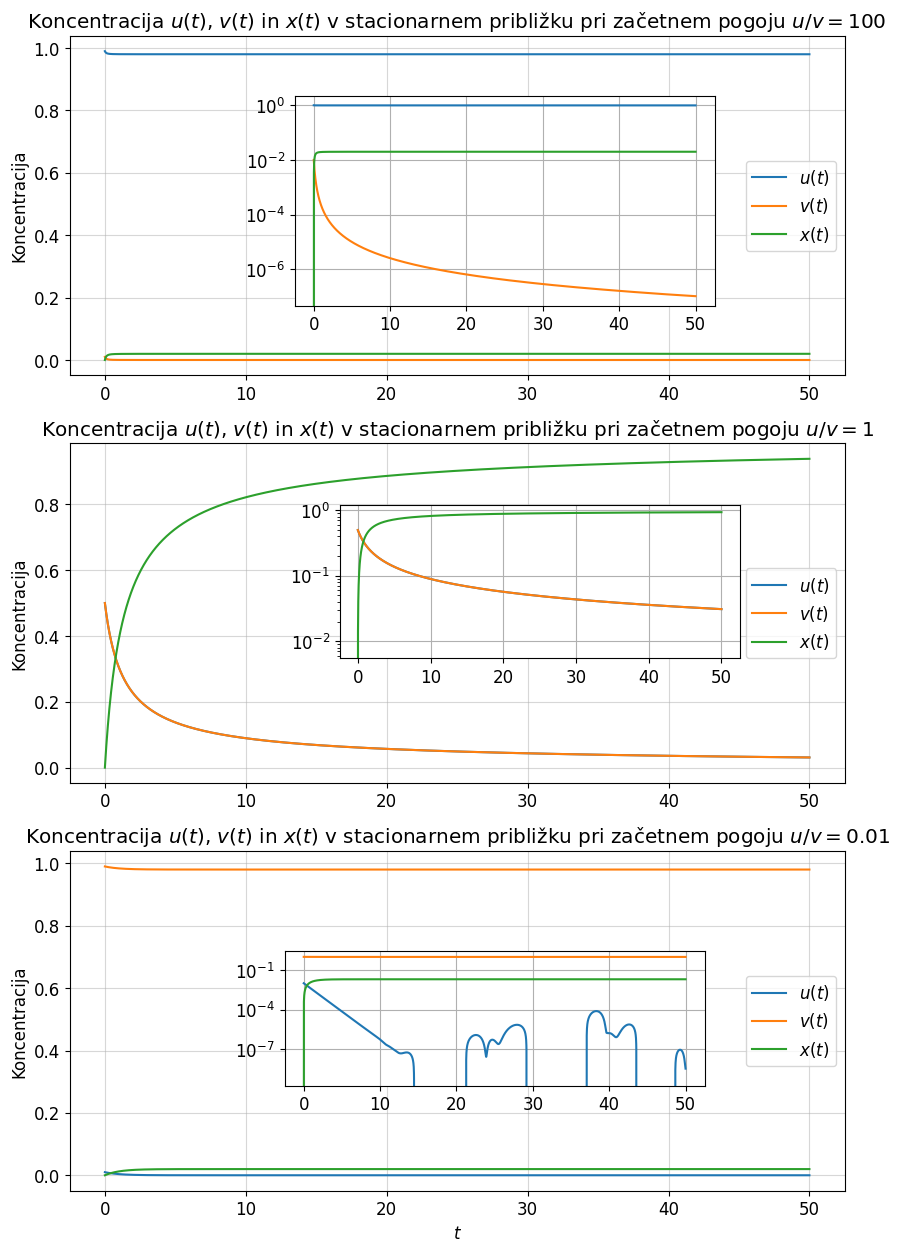

In [68]:
# Plot the solutions
fig = plt.figure(figsize=(10,15))

ax1 = fig.add_subplot(3,1,1)
ax1.grid(alpha=0.5)
ax1.set_title(r'Koncentracija $u(t)$, $v(t)$ in $x(t)$ v stacionarnem približku pri začetnem pogoju $u/v=100$')
ax1.set_ylabel('Koncentracija')
ax1.plot(ts, u_solution_stac1, label=r'$u(t)$')
ax1.plot(ts, v_solution_stac1, label=r'$v(t)$')
ax1.plot(ts, x_solution_stac1, label=r'$x(t)$')
ax1.legend()

ax1_inset = fig.add_axes([0.35, 0.70, 0.42, 0.14])  # Adjust the values as needed
ax1_inset.grid()
ax1_inset.set_yscale('log')
ax1_inset.plot(ts, u_solution_stac1, label=r'$u(t)$')
ax1_inset.plot(ts, v_solution_stac1, label=r'$v(t)$')
ax1_inset.plot(ts, x_solution_stac1, label=r'$x(t)$')


ax2 = fig.add_subplot(3,1,2)
ax2.grid(alpha=0.5)
ax2.set_title(r'Koncentracija $u(t)$, $v(t)$ in $x(t)$ v stacionarnem približku pri začetnem pogoju $u/v=1$')
ax2.set_ylabel('Koncentracija')
ax2.plot(ts, u_solution_stac2, label=r'$u(t)$')
ax2.plot(ts, v_solution_stac2, label=r'$v(t)$')
ax2.plot(ts, x_solution_stac2, label=r'$x(t)$')
ax2.legend()

ax2_inset = fig.add_axes([0.395, 0.465, 0.40, 0.102])  # Adjust the values as needed
ax2_inset.grid()
ax2_inset.set_yscale('log')
ax2_inset.plot(ts, u_solution_stac2, label=r'$u(t)$')
ax2_inset.plot(ts, v_solution_stac2, label=r'$v(t)$')
ax2_inset.plot(ts, x_solution_stac2, label=r'$x(t)$')


ax3 = fig.add_subplot(3,1,3)
ax3.grid(alpha=0.5)
ax3.set_title(r'Koncentracija $u(t)$, $v(t)$ in $x(t)$ v stacionarnem približku pri začetnem pogoju $u/v=0.01$')
ax3.set_ylabel('Koncentracija')
ax3.set_xlabel(r'$t$')
ax3.plot(ts, u_solution_stac3, label=r'$u(t)$')
ax3.plot(ts, v_solution_stac3, label=r'$v(t)$')
ax3.plot(ts, x_solution_stac3, label=r'$x(t)$')
ax3.legend(loc='right')

ax3_inset = fig.add_axes([0.34, 0.18, 0.42, 0.09])  # Adjust the values as needed
ax3_inset.grid()
ax3_inset.set_yscale('log')
ax3_inset.plot(ts, u_solution_stac3, label=r'$u(t)$')
ax3_inset.plot(ts, v_solution_stac3, label=r'$v(t)$')
ax3_inset.plot(ts, x_solution_stac3, label=r'$x(t)$')

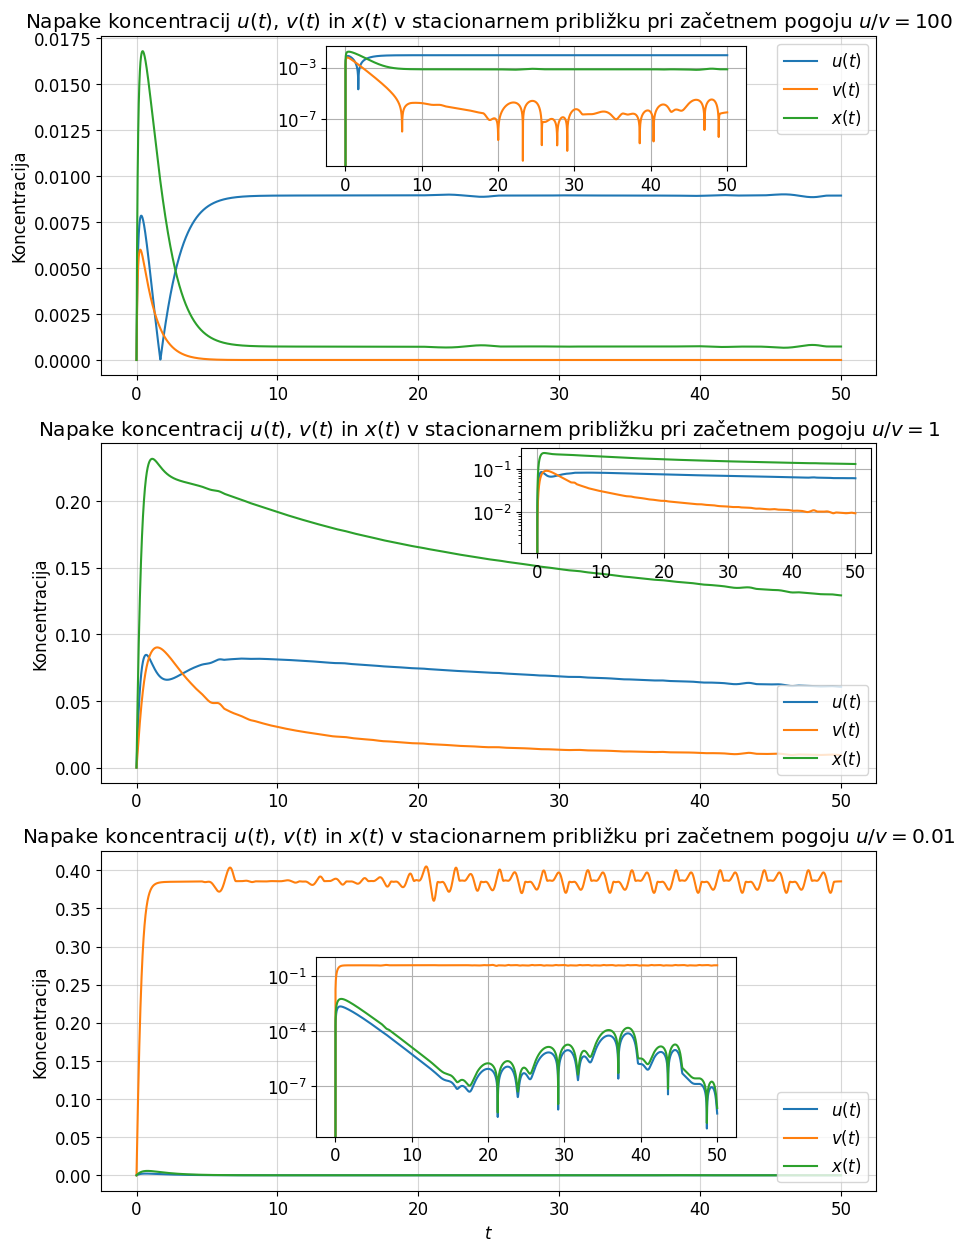

In [60]:
# Plot the solutions
fig = plt.figure(figsize=(10,15))

ax1 = fig.add_subplot(3,1,1)
ax1.grid(alpha=0.5)
ax1.set_title(r'Napake koncentracij $u(t)$, $v(t)$ in $x(t)$ v stacionarnem približku pri začetnem pogoju $u/v=100$')
ax1.set_ylabel('Koncentracija')
ax1.plot(ts, np.abs(u_solution_stac1-u_solution1), label=r'$u(t)$')
ax1.plot(ts, np.abs(v_solution_stac1-v_solution1), label=r'$v(t)$')
ax1.plot(ts, np.abs(x_solution_stac1-x_solution1), label=r'$x(t)$')
ax1.legend()

ax1_inset = fig.add_axes([0.35, 0.793, 0.42, 0.08])  # Adjust the values as needed
ax1_inset.grid()
ax1_inset.set_yscale('log')
ax1_inset.plot(ts, np.abs(u_solution_stac1-u_solution1), label=r'$u(t)$')
ax1_inset.plot(ts, np.abs(v_solution_stac1-v_solution1), label=r'$v(t)$')
ax1_inset.plot(ts, np.abs(x_solution_stac1-x_solution1), label=r'$x(t)$')


ax2 = fig.add_subplot(3,1,2)
ax2.grid(alpha=0.5)
ax2.set_title(r'Napake koncentracij $u(t)$, $v(t)$ in $x(t)$ v stacionarnem približku pri začetnem pogoju $u/v=1$')
ax2.set_ylabel('Koncentracija')
ax2.plot(ts, np.abs(u_solution_stac2-u_solution2), label=r'$u(t)$')
ax2.plot(ts, np.abs(v_solution_stac2-v_solution2), label=r'$v(t)$')
ax2.plot(ts, np.abs(x_solution_stac2-x_solution2), label=r'$x(t)$')
ax2.legend(loc='lower right')

ax2_inset = fig.add_axes([0.545, 0.535, 0.35, 0.07])  # Adjust the values as needed
ax2_inset.grid()
ax2_inset.set_yscale('log')
ax2_inset.plot(ts, np.abs(u_solution_stac2-u_solution2), label=r'$u(t)$')
ax2_inset.plot(ts, np.abs(v_solution_stac2-v_solution2), label=r'$v(t)$')
ax2_inset.plot(ts, np.abs(x_solution_stac2-x_solution2), label=r'$x(t)$')


ax3 = fig.add_subplot(3,1,3)
ax3.grid(alpha=0.5)
ax3.set_title(r'Napake koncentracij $u(t)$, $v(t)$ in $x(t)$ v stacionarnem približku pri začetnem pogoju $u/v=0.01$')
ax3.set_ylabel('Koncentracija')
ax3.set_xlabel(r'$t$')
ax3.plot(ts, np.abs(u_solution_stac3-u_solution3), label=r'$u(t)$')
ax3.plot(ts, np.abs(v_solution_stac3-v_solution3), label=r'$v(t)$')
ax3.plot(ts, np.abs(x_solution_stac3-x_solution3), label=r'$x(t)$')
ax3.legend(loc='lower right')

ax3_inset = fig.add_axes([0.34, 0.146, 0.42, 0.12])  # Adjust the values as needed
ax3_inset.grid()
ax3_inset.set_yscale('log')
ax3_inset.plot(ts, np.abs(u_solution_stac3-u_solution3), label=r'$u(t)$')
ax3_inset.plot(ts, np.abs(v_solution_stac3-v_solution3), label=r'$v(t)$')
ax3_inset.plot(ts, np.abs(x_solution_stac3-x_solution3), label=r'$x(t)$')

### Končna koncentracija produkta v odvisnosti začetnega razmerja u/v

In [86]:
def f_exact(time, vec, p, q, r, s, t):
    u, v, x, y, z = vec

    # Compute the derivatives
    dudt = s*x*y - r*u*z
    dvdt = q*z**2 - p*v - t*v*y
    dxdt = r*z*u - s*x*y + t*y*v
    dydt = r*z*u - s*x*y - t*y*v
    dzdt = 2*p*v - 2*q*z**2 - r*u*z + s*x*y + t*y*v

    return [dudt, dvdt, dxdt, dydt, dzdt]

def f_stac(time, vec, k, m):
    u, v, x = vec

    # Compute the derivatives
    dudt = -k/2. * u*np.sqrt(v) / (m+x/v)
    dvdt = -k/2. * u*np.sqrt(v) / (m+x/v)
    dxdt = k * u*np.sqrt(v)/(m+x/v)

    return [dudt, dvdt, dxdt]


# Parameters
p = 1.
q = 1.
r = 1.
s = 2.
t = 5.
k = 2*t*r/s * np.sqrt(p/q)
m = t/s

# Initial values and desired time span
xs = np.linspace(0, 10, 1000)

t_final = 1000.
t_initial = 0.
t_span = (t_initial, t_final)

xs_exact = np.zeros_like(xs)
xs_stac= np.zeros_like(xs)

for i, x in enumerate(xs):

    initial_u = x/(x+1)
    initial_v = 1/(x+1)

    y0_exact = [initial_u, initial_v, 0., 0., 0.]
    y0_stac = [initial_u, initial_v, 0.]

    solution_exact = solve_ivp(f_exact, t_span, y0_exact, method='DOP853', args=(p,q,r,s,t))
    solution_stac = solve_ivp(f_stac, t_span, y0_stac, method='DOP853', args=(k,m))

    u_solution_exact, v_solution_exact, x_solution_exact, y_solution_exact, z_solution_exact = solution_exact.y
    u_solution_stac, v_solution_stac, x_solution_stac = solution_stac.y

    xs_exact[i] = np.max(x_solution_exact)
    xs_stac[i] = np.max(x_solution_stac)

C:\Users\Tadej\AppData\Local\Temp\ipykernel_14224\1362337010.py:17: RuntimeWarning: invalid value encountered in sqrt
  dudt = -k/2. * u*np.sqrt(v) / (m+x/v)
C:\Users\Tadej\AppData\Local\Temp\ipykernel_14224\1362337010.py:18: RuntimeWarning: invalid value encountered in sqrt
  dvdt = -k/2. * u*np.sqrt(v) / (m+x/v)
C:\Users\Tadej\AppData\Local\Temp\ipykernel_14224\1362337010.py:19: RuntimeWarning: invalid value encountered in sqrt
  dxdt = k * u*np.sqrt(v)/(m+x/v)


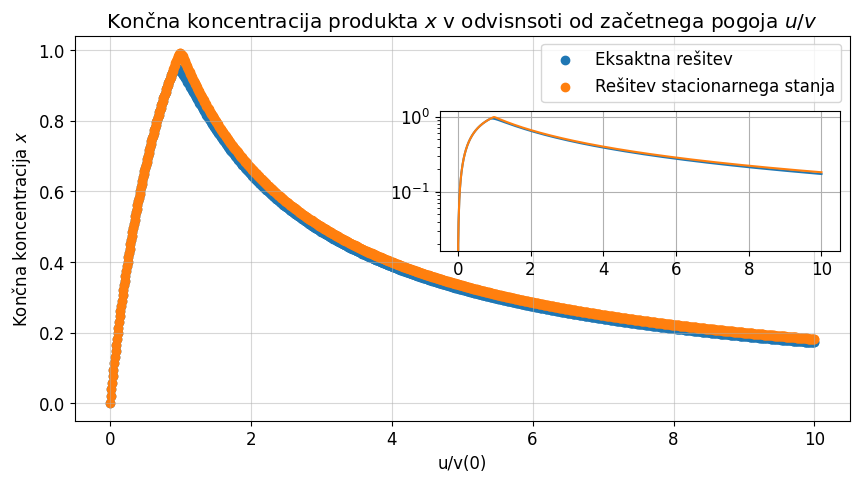

In [87]:
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111)
ax.grid(alpha=0.5)
ax.set_title(r'Končna koncentracija produkta $x$ v odvisnsoti od začetnega pogoja $u/v$')
ax.set_xlabel(r'u/v(0)')
ax.set_ylabel(r'Končna koncentracija $x$')
ax.scatter(xs, xs_exact, label='Eksaktna rešitev')
ax.scatter(xs, xs_stac, label='Rešitev stacionarnega stanja')
ax.legend()

ax_inset = fig.add_axes([0.49, 0.45, 0.4, 0.28])  # Adjust the values as needed
ax_inset.grid()
ax_inset.set_yscale('log')
ax_inset.plot(xs, xs_exact, label='Eksaktna rešitev')
ax_inset.plot(xs, xs_stac, label='Rešitev stacionarnega stanja')

### Ali kaj pomaga, če v začetno stanje primešamo HBr?

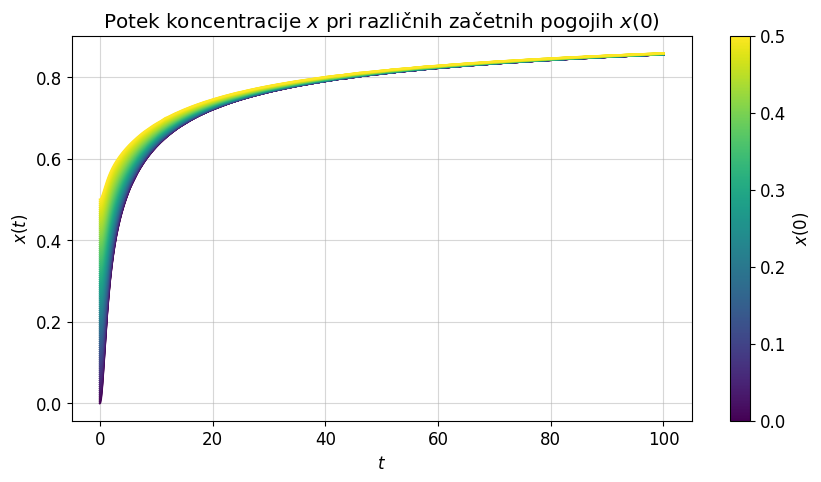

In [95]:
# Sistem od diferential equations

def f(time, vec, p, q, r, s, t):
    u, v, x, y, z = vec

    # Compute the derivatives
    dudt = s*x*y - r*u*z
    dvdt = q*z**2 - p*v - t*v*y
    dxdt = r*z*u - s*x*y + t*y*v
    dydt = r*z*u - s*x*y - t*y*v
    dzdt = 2*p*v - 2*q*z**2 - r*u*z + s*x*y + t*y*v

    return [dudt, dvdt, dxdt, dydt, dzdt]

# Parameters
p = 1.
q = 1.
r = 1.
s = 2.
t = 5.

# Initial values and desired time span
t_initial = 0.
t_final = 100.
num_points = 5000
ts = np.linspace(t_initial, t_final, num_points)
t_span = (t_initial, t_final)

initial_xs = np.linspace(0, 0.5, 100)

cmap = get_cmap('viridis')
norm = Normalize(vmin=min(initial_xs), vmax=max(initial_xs))

# Figure
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111)
ax.grid(alpha=0.5)
ax.set_title(r'Potek koncentracije $x$ pri različnih začetnih pogojih $x(0)$')
ax.set_ylabel(r'$x(t)$')
ax.set_xlabel(r'$t$')

for initial_x in initial_xs:
    color = cmap(norm(initial_x))

    initial_u = 0.5 - initial_x/2.
    initial_v = 0.5 - initial_x/2.

    y0 = [initial_u, initial_v, initial_x, 0., 0.]

    # Solve the diferenial equations
    solution = solve_ivp(f, t_span, y0, t_eval=ts, method='DOP853', args=(p,q,r,s,t))

    # The solution in in solution.y
    u_solution, v_solution, x_solution, y_solution, z_solution = solution.y

    ax.plot(ts, x_solution, color=color)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, label=r'$x(0)$')